# EDA (Stocks and Commodities)

In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

### This section explores `all_commodities.csv`

#### First we process the dataset `all_commodities.csv`, note that there is a missing value in the categories of commodities.

In [31]:
commodities_df = pd.read_csv('Datathon_Data/all_commodities.csv', parse_dates=['Date-Time'], index_col='Date-Time')
commodities_df.head()
unique_commodities = commodities_df['Commodity'].unique()
df_copy = commodities_df.copy()
unique_commodities

array(['Coffee', 'Corn', nan, 'Sugar'], dtype=object)

#### For now we fill the missing value with a placeholder "Unknown"

In [32]:
df_copy['Commodity'] = df_copy['Commodity'].fillna('Unknown')
unique_commodities = df_copy['Commodity'].unique()
unique_commodities

array(['Coffee', 'Corn', 'Unknown', 'Sugar'], dtype=object)

The following is time series visualization for the four different categories in the commodities. You might be wondering where is the "Corn", actually there is only one row for this category in the original dataframe, so it's not visible.

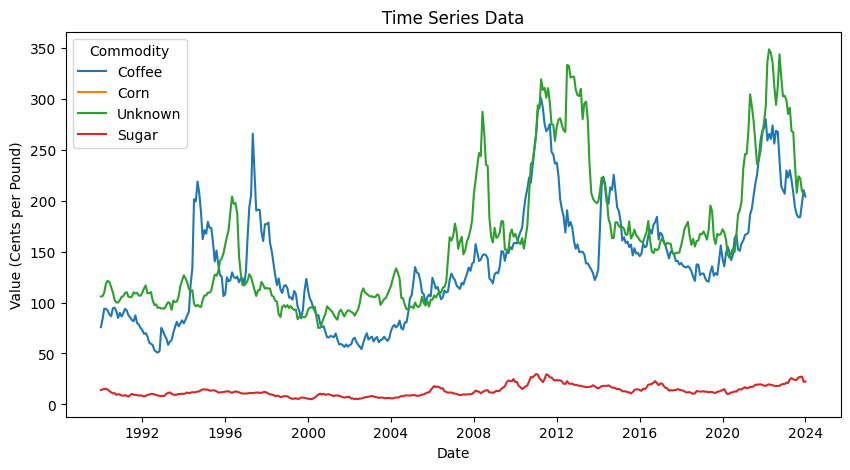

In [33]:
plt.figure(figsize=(10, 5))
for commodity in df_copy['Commodity'].unique():
    subset = df_copy[df_copy['Commodity'] == commodity]
    plt.plot(subset.index, subset['Value'], label=commodity)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value (Cents per Pound)')
plt.legend(title='Commodity')
plt.show()

### This section explores `all_stock_and_etfs.csv`

In [42]:
stock_n_etfs_df = pd.read_csv('Datathon_Data/all_stock_and_etfs.csv', parse_dates=['Date-Time'], index_col='Date-Time')
stock_n_etfs_df = stock_n_etfs_df.copy()
stock_n_etfs_df.head()

,Open,High,Low,Close,Volume,Ticker_Symbol
Date-Time,,,,,,
2024-02-20,29.09,29.7100,29.0001,29.44,2673889,HRL
2024-02-16,29.01,29.1700,28.7650,28.99,5655091,HRL
2024-02-15,28.94,29.2210,28.8500,29.11,2380372,HRL
2024-02-14,28.76,28.8254,28.5100,28.80,2690379,HRL
2024-02-13,29.56,29.8000,28.6350,28.72,4173650,HRL


### Here’s a brief overview of what each ticker symbol stands for:

<ol style="font-size: 18px;">
  <li><strong>HRL</strong> - Hormel Foods Corporation</li>
  <li><strong>VOO</strong> - Vanguard S&P 500 ETF (an ETF that tracks the S&P 500 Index)</li>
  <li><strong>ADM</strong> - Archer Daniels Midland Company</li>
  <li><strong>AGCO</strong> - AGCO Corporation (a manufacturer of agricultural equipment)</li>
  <li><strong>DIA</strong> - SPDR Dow Jones Industrial Average ETF Trust (an ETF that tracks the Dow Jones Industrial Average)</li>
  <li><strong>PEP</strong> - PepsiCo, Inc.</li>
  <li><strong>QSR</strong> - Restaurant Brands International (parent company of Burger King, Tim Hortons, and Popeyes)</li>
  <li><strong>TSCO</strong> - Tractor Supply Company</li>
  <li><strong>ONEQ</strong> - Fidelity Nasdaq Composite Index Tracking Stock (an ETF that tracks the Nasdaq Composite Index)</li>
  <li><strong>PPC</strong> - Pilgrim's Pride Corporation (a poultry producer)</li>
  <li><strong>CAG</strong> - ConAgra Brands, Inc. (a food company)</li>
  <li><strong>DRI</strong> - Darden Restaurants, Inc. (owner of Olive Garden, LongHorn Steakhouse, and other brands)</li>
  <li><strong>HSY</strong> - The Hershey Company</li>
  <li><strong>CAT</strong> - Caterpillar Inc. (a manufacturer of construction and mining equipment)</li>
  <li><strong>SBUX</strong> - Starbucks Corporation</li>
  <li><strong>CMG</strong> - Chipotle Mexican Grill, Inc.</li>
  <li><strong>COKE</strong> - Coca-Cola Consolidated, Inc. (a bottling company)</li>
  <li><strong>CNHI</strong> - CNH Industrial N.V. (a manufacturer of agricultural and construction equipment)</li>
  <li><strong>SPY</strong> - SPDR S&P 500 ETF Trust (another ETF that tracks the S&P 500 Index)</li>
  <li><strong>DE</strong> - Deere & Company (a manufacturer of agricultural and construction equipment)</li>
  <li><strong>TSN</strong> - Tyson Foods, Inc. (a food company specializing in poultry, beef, and pork)</li>
  <li><strong>GIS</strong> - General Mills, Inc. (a food company)</li>
  <li><strong>WEN</strong> - Wendy's Company</li>
  <li><strong>YUM</strong> - Yum! Brands, Inc. (parent company of Taco Bell, Pizza Hut, and KFC)</li>
  <li><strong>VMI</strong> - Valmont Industries, Inc. (a provider of engineered support structures and irrigation equipment)</li>
  <li><strong>MCD</strong> - McDonald's Corporation</li>
  <li><strong>SAP</strong> - SAP SE (a software company specializing in enterprise resource planning)</li>
  <li><strong>DPZ</strong> - Domino's Pizza, Inc.</li>
  <li><strong>ALG</strong> - Alamo Group Inc. (a manufacturer of equipment for infrastructure maintenance)</li>
</ol>


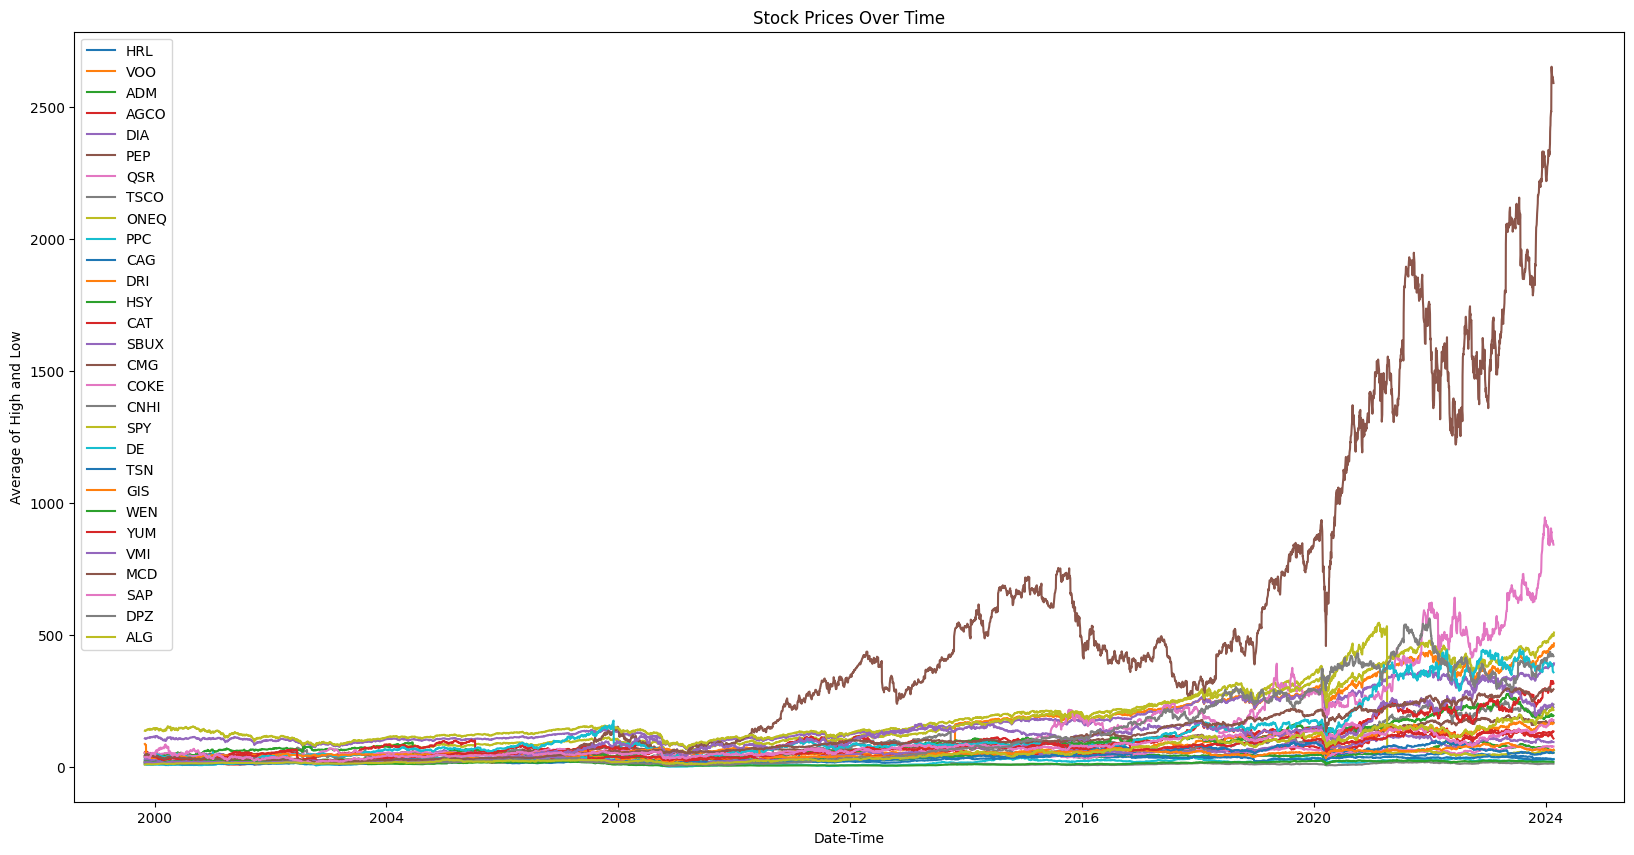

In [43]:
plt.figure(figsize=(20, 10))
for ticker in stock_n_etfs_df['Ticker_Symbol'].unique():
    subset = stock_n_etfs_df[stock_n_etfs_df['Ticker_Symbol'] == ticker]
    plt.plot(subset.index, (subset['High'] + subset['Low']) / 2, label=ticker)

plt.xlabel('Date-Time')
plt.ylabel('Average of High and Low')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

### The winner is CMG (Chipole Mexican Grill Inc.)

In [44]:
stock_n_etfs_df[stock_n_etfs_df['Low'] >= 2500]

,Open,High,Low,Close,Volume,Ticker_Symbol
Date-Time,,,,,,
2024-02-20,2595.490,2612.1600,2569.0100,2580.20,203214,CMG
2024-02-16,2620.000,2625.4100,2597.8200,2598.43,138362,CMG
2024-02-15,2616.470,2626.7200,2602.3500,2618.00,167464,CMG
2024-02-14,2614.530,2632.5500,2593.8700,2620.19,135878,CMG
2024-02-13,2588.330,2642.3050,2586.0600,2599.14,231596,CMG
2024-02-12,2632.260,2634.0000,2594.8600,2608.23,207934,CMG
2024-02-09,2636.980,2659.1100,2615.9300,2638.35,211052,CMG
2024-02-08,2678.050,2688.9999,2616.0100,2620.48,387018,CMG
2024-02-07,2561.495,2725.8300,2505.0001,2666.99,901180,CMG
